# Bifurcaciones

In [1]:
using Pkg
Pkg.activate("..")

  Activating environment at `~/Desktop/Diego/Diego_Escuela/SelectosC/2021-2_TSelecFisComp-1/Project.toml`


In [2]:
using Plots
gr(grid=false)

Plots.GRBackend()

Empezamos cargando la función `itera_mapeo` que hicimos en una clase pasada;
noten  que hay  algunos cambios pequeños (evitamos crear/usar el vector `its`).

In [3]:
"""
    itera_mapeo(f, x0, n)

Itera la función ``x->f(x)``, de una dimensión, `n` veces a partir de la
condición inicial `x0`. Regresa
"""
function itera_mapeo(f, x0, n::Int)
    #Defino/creo tres vectores de salida (de `Float64`s)
    #its = [x0]
    its_x = [x0]
    its_y = [0.0]
    #Obtengo los iterados
    for i=1:n
        x1 = f(x0)
        #push!(its, x1)
        push!(its_x, x0, x1)
        push!(its_y, x1, x1)
        x0 = x1
    end
    return its_x, its_y
end

itera_mapeo

## Un ejemplo de bifurcación

Consideremos a la *familia* de mapeos cuadráticos dada por

\begin{equation}
    Q_c(x) = x^2 + c,
\end{equation}

donde $c\in\mathbb{R}$ es un parámetro, y $x\in[-2,2]$. Estudiaremos, por un lado,
cómo dependen los puntos fijos de $c$, y cómo varía su estabilidad.

Los puntos fijos satisfacen la ecuación $Q_c(x) = x^2+c=x$, de donde obtenemos
(analíticamente) dos raíces:

\begin{eqnarray}
x_+(c) & = & \frac{1}{2}( 1 + \sqrt{1-4c} ),\\
x_-(c) & = & \frac{1}{2}( 1 - \sqrt{1-4c} ).\\
\end{eqnarray}

De aquí vemos que, si $1-4c<0$, es decir $c>1/4$, **no** existen puntos fijos (reales)
del mapeo cuadrático. En este caso, **toda** condición inicial terminará en infinito.

En cambio, si se satisface que $c<1/4$, entonces existen dos puntos fijos. En este
caso tenemos que $x_+(c)\ge 1/2 \ge x_-(c)$; las igualdades sólo ocurren para
$c=1/4$, que es el valor de $c$ donde *aparecen* los puntos fijos.

Esta *transición* en la que el mapeo pasa de no tener puntos fijos ($c>1/4$) a tener
dos puntos fijos ($c<1/4$) al variar un parámetro es un  ejemplo de lo que se llama una *bifurcación*.
En este caso concreto, es una *bifurcación de silla-nodo* (saddle-node) o
*bifurcación tangente*.

In [4]:
Qc(x,c) = x^2 + c       # Mapeo cuadrático

qc1 = x -> Qc(x, 0.5)   # Mapeo cuadrático con c =  0.5
qc2 = x -> Qc(x, -0.5)  # Mapeo cuadrático con c = -0.5
qc3 = x -> Qc(x, 0.25)  # Mapeo cuadrático con c =  0.25

#5 (generic function with 1 method)

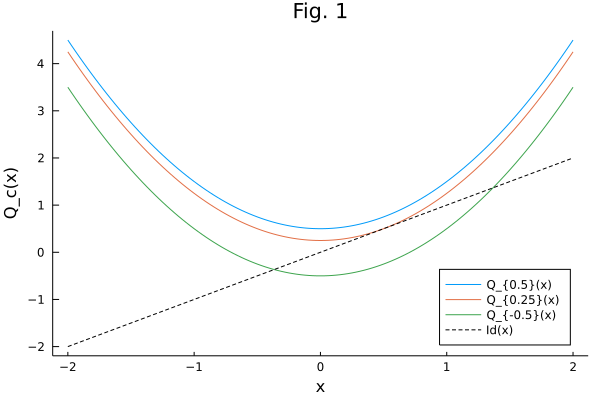

In [5]:
domx = -2:1/32:2 # Dominio de interés

p = plot(domx, qc1, xaxis=("x", ), yaxis="Q_c(x)",
    label="Q_{0.5}(x)", legend=:bottomright)
plot!(domx, qc3, label="Q_{0.25}(x)")
plot!(domx, qc2, label="Q_{-0.5}(x)")
plot!(domx, identity, label="Id(x)", color=:black, linestyle=:dash)
title!("Fig. 1")

In [8]:
savefig(p,"Fig31-1.png")

Insertamos la figura en la celda markdown con:
```
   ![Fig 1](Fig31-1.png "Fig. 1")
```

![Fig 1](Fig31-1.png)

Como hemos visto, la derivada del mapeo evaluada en los puntos fijos da información
sobre la estabilidad lineal del punto fijo, es decir, el caracter atractivo o
repulsivo del mapeo cerca del punto fijo.

En el caso del mapeo cuadrático tenemos que $Q_c'(x) = 2x$.

Por lo tanto, el punto fijo $x_+(c)$ es repulsivo (linealmente inestable).

En cuanto a $x_-(c)$, el punto será atractivo si se cumple $|Q_c'(x_-(c))| = 2 |x_-(c)|<1$.
De aquí es fácil obtener que, para que $x_-(c)$ sea linealmente estable, se debe cumplir
la desigualdad

\begin{equation}
-1 < 1 - \sqrt{1-4c} < 1,
\end{equation}

que equivale a $2 > \sqrt{1-4c} > 0$. Esto a su vez nos conduce a la condición
$1/4 > c > -3/4$ para que $x_-(c)$ sea un punto atractivo.

Todo esto se puede resumir con el siguiente *diagrama de bifurcación*.

In [11]:
pplus(c) = 0.5*(1+sqrt(1-4*c))
pminus(c) = 0.5*(1-sqrt(1-4*c))

domc = -2:1/128:1/4

p2=plot(domc, pplus, xaxis=("c", (-2,1)), yaxis=("x_pm(c)"),
    label="x_+(c)", color=:red)
plot!(-3/4:1/64:1/4, pminus, label="x_-(c)", color=:blue)
plot!(-2:1/64:-3/4, pminus, label="", color=:red, line=(:dash))
title!("Fig. 2")
savefig(p2,"Fig31-2.png")

(Insertamos la figura)

![Fig 2](Fig31-2.png)

El diagrama de bifurcación anterior fue obtenido a partir de la dependencia de los
puntos fijos del parámetro $c$, que obtuvimos de manera explícita. Uno puede también obtener la
parte estable de este diagrama de bifurcación de manera numérica, iterando el mapeo
varias veces a partir de una condición inicial $x_0$ que esté en la cuenca de atracción
de $x_-(c)$, es decir, muy cerca de $x_-(c)$.

El escenario descrito anteriormente es lo que constituye a la bifurcación silla-nodo o
tangente.

Formalmente, tenemos que la bifurcación de silla-nodo para una familia monoparamétrica
$F_\lambda$ ocurre en $\lambda_0$, cuando existe un intervalo *abierto* $I$ y un
$\epsilon>0$ tal que:

1. Para $\lambda_0-\epsilon<\lambda<\lambda_0$ no hay puntos fijos de $F_\lambda$ en $I$.
1. Para $\lambda=\lambda_0$ existe un sólo punto fijo de $F_\lambda$ en $I$ y éste es neutral.
1. Para $\lambda_0<\lambda<\lambda_0+\epsilon$ tenemos dos puntos fijos de $F_\lambda$, uno es repulsivo y el otro es atractivo.

Hay dos puntos importantes que vale la pena enfatizar. Primero, la bifurcación de
silla-nodo ocurre cuando $F_{\lambda_0}(x)$ tiene una tangencia cuadrática con la diagonal,
es decir, $F'_{\lambda_0}(x_0)=1$ y $F''_{\lambda_0}(x_0)\ne 0$. Esto es, localmente
$F_{\lambda_0}$ es cóncava o convexa.

El segundo punto es que la teoría de bifurcaciones es una teoría local alrededor del
parámetro $\lambda_0$. Es por eso que la definición incluye $\epsilon>0$. La teoría
no dice nada de qué puede pasar lejos de $\lambda_0$.

## Otro tipo de bifurcación

Siguiendo con el ejemplo de la familia cuadrática $Q_c(x)$, en $c=-3/4$ *otra* bifurcación
ocurre, y ésta está relacionada con el cambio de estabilidad de $x_-(c)$.

Al volverse inestable $x_-(c)$, es decir $c<-3/4$, como sugiere la siguiente
figura 3, *aparece* un ciclo de periodo 2 que, de hecho, es linealmente estable.

In [12]:
Qc(x,c) = x^2 + c       # Mapeo cuadrático
qc1 = x -> Qc(x, -0.5)  # Mapeo cuadrático con c = -0.5
qc2 = x -> Qc(x, -0.76)  # Mapeo cuadrático con c = -0.76

#9 (generic function with 1 method)

In [14]:
p = plot(domx, qc1, xaxis=("x", ), yaxis="Q_c(x)",
    label="Q_{-0.5}(x)", legend=:bottomright)
plot!(domx, qc2, xaxis=("x", ), yaxis="Q_c(x)", label="Q_{-1}(x)")
plot!(domx, identity, xaxis=("x"), label="Id(x)", color=:black,
    linestyle=:dash)
plot!(domx, x -> pplus(-0.5)+zero(x), label="x_+(c)", color=:black, linestyle=:dot)
plot!(domx, x -> pplus(-0.76)+zero(x), label="x_+(c)", color=:black, linestyle=:dot)

vx, vqc1 = itera_mapeo(qc1, 1/256, 4)
plot!(p, vx, vqc1, marker=(:circle, 3, 0.4), label="", color=:green,
    line=:dot)

vx, vqc2 = itera_mapeo(qc2, 1/256, 4)
plot!(p, vx, vqc2, marker=(:circle, 3, 0.4), label="", color=:green)

ylims!(-1.6, 2)
title!("Fig. 3")
savefig(p,"Fig31-3.png")

(Insertamos la figura)

![Fig 3](Fig31-3.png)

Para entender esto, obviamente tenemos que analizar el mapeo $Q^2_c(x)$, que
explícitamente está dado por

\begin{equation}
Q^2_c(x) = (x^2+c)^2+c = x^4 + 2cx^2 + c^2+c.
\end{equation}

Los puntos fijos de $Q_c^2(x)$ satisfacen:

\begin{equation}
Q^2_c(x) -x = (x^2+c)^2+c = x^4 + 2cx^2 - x + c^2+c = 0.
\end{equation}

Para $c<-3/4$ sabemos que dos soluciones de esta ecuación son $x_+(c)$ y $x_-(c)$,
ya que los puntos fijos (periodo 1) de $Q_c(x)$ también son puntos fijos del
mapeo $Q^2_c(x)$.

Por lo tanto, $x-x_+(c)$ y $x-x_-(c)$ factorizan a $Q^2_c(x) -x$. Entonces,
podemos escribir:

\begin{equation}
Q^2_c(x) -x = (x-x_+(c))(x-x_-(c))(x^2+x+c+1) = 0,
\end{equation}

de donde obtenemos las soluciones

\begin{eqnarray}
q_+(c) & = & \frac{1}{2}( -1 + \sqrt{-3-4c} ),\\
q_-(c) & = & \frac{1}{2}( -1 - \sqrt{-3-4c} ).\\
\end{eqnarray}

Claramente, $q_\pm(c)$ son reales si $-3-4c\ge 0$, es decir, si $c\le-3/4$. Cuando $c=-3/4$
tenemos que $q_\pm(-3/4) = x_-(-3/4)$, es decir, los nuevos puntos fijos de $Q^2_c(x)$
se originan en $x_-(-3/4)$.

En cuanto a la estabilidad, como vimos antes para puntos periódicos, ésta viene dada
por la derivada

\begin{equation}
{Q_c^2}'(q_+(c)) = {Q_c^2}'(q_-(c)) = Q_c'(q_+(c)) Q_c'(q_-(c)) = 4 q_+(c) q_-(c) = 4+4c.
\end{equation}

Por lo tanto, en el momento en que aparece la órbita de periodo 2, ésta es neutral:
${Q_c^2}'(q_\pm(-3/4)) = 1$. De aquí, además, podemos ver que
para $-5/4<c<-3/4$, el ciclo de periodo 2 es atractivo, ya que $|{Q_c^2}'(q_\pm(c))|<1$,
mientras que para $c<-5/4$, éste es repulsivo.

In [15]:
pplus(c) = 0.5*(1+sqrt(1-4*c))
pminus(c) = 0.5*(1-sqrt(1-4*c))

domc = -2:1/64:1/4

p=plot(-2:1/64:1/4, pplus, xaxis=("c", (-2,1)), yaxis=("x_pm(c), q_pm(c)"), color=:red)
plot!(-3/4:1/64:1/4, pminus, color=:blue, legend=:false)
plot!(-2:1/64:-3/4, pminus, color=:red, line=(:dash))

qplus(c) = 0.5*(-1+sqrt(-3-4*c))
qminus(c) = 0.5*(-1-sqrt(-3-4*c))

plot!(-5/4:1/64:-3/4, qplus, color=:blue)
plot!(-5/4:1/64:-3/4, qminus, color=:blue)
plot!(-2:1/64:-5/4, qplus, color=:red, line=(:dash))
plot!(-2:1/64:-5/4, qminus, color=:red, line=(:dash))

title!("Fig. 4")
savefig(p,"Fig31-4.png")

(Insertamos la figura)

![Fig 4](Fig31-4.png)

La bifurcación que acabamos de describir se llama, como es de esperarse,
*bifurcación de doblamiento de periodo*.

De manera más formal, una bifurcación de doblamiento de periodo para una familia
monoparamétrica de mapeos $F_\lambda$ ocurren en $\lambda_0$ si existe un intervalo
*abierto* $I$ y un $\epsilon>0$ tal que:

1. Para toda $\lambda$ en el intervalo $[\lambda_0-\epsilon, \lambda_0+\epsilon]$ existe un único punto fijo $p_\lambda$ en $I$.
1. Para $\lambda_0-\epsilon<\lambda<\lambda_0$, el mapeo $F_\lambda$ no tiene ciclos de periodo 2 en $I$ y $p_\lambda$ es un atractor (respectivamente repulsor).
1. Para $\lambda_0<\lambda<\lambda_0+\epsilon$, existe un ciclo de periodo 2 en $I$ para el mapeo el mapeo $F_\lambda$, que denotamos por $q_\lambda^1$ y $q_\lambda^2$, que es atractivo (resp. repulsivo), y el punto fijo $p_\lambda$ es repulsor (resp. atractor).
1. En el límite $\lambda\to\lambda_0^+$, tenemos que $q_\lambda^i\to p_\lambda$.

Esto es, al cambiar el parámetro, un punto fijo cambia de estabilidad (de atractivo
pasa a ser repulsivo, o viceversa), y al cambiar de estabilidad da lugar a la
aparición de una órbita de periodo dos que tiene la estabilidad que tenía el
punto fijo antes de la bifurcación.

De manera más general, una órbita de periodo
$n$ estable, se tornará inestable, y dará origen a una nueva órbita estable de periodo $2n$.

La dirección de las desigualdades (o la forma en que cambiamos el parámetro) es irrelevante.

La bifurcación de doblamiento de periodo ocurre cuando $F_\lambda(x)$ es
perpendicular a la diagonal, es decir, $F_{\lambda_0}'(p_{\lambda_0})=-1$. Usando la
regla de la cadena tenemos que ${F^2_{\lambda_0}}''(p_{\lambda_0})=1$.

#### Ejercicio 1

Para el mapeo $Q_c(x) = x^2 + c$, ¿cuál es el dominio $\cal{D}\subset \mathbb{R}$ de
$Q_c(x)$ tal que la órbita generada por una condición inicial $x_0\in \cal{D}$ *no*
escapa a infinito a ningún tiempo?

In [ ]:
#(Respuesta)

#### Ejercicio 2

Para el mapeo $F_\lambda(x) = \lambda x(1-x)$, ¿qué podemos decir de la bifurcación
que ocurre en $\lambda_0=1$? ¿Es o no una bifurcación de silla-nodo?

In [ ]:
#(Respuesta)

#### Ejercicio 3

- Obtengan numéricamente el diagrama de bifurcación para el mapeo $Q_c(x)$ con $-3/4 < c < 1/4$, a partir de (muchas) iteraciones de una condición inicial. La idea es iterar un gran número de veces una condición inicial hasta que, en principio, se llegue al ciclo periódico; esto se repite para distintos valores de $c$. Noten que si bien en este caso sabemos que  hay ciclos periódicos, en general no conocemos la periodicidad de dichos ciclos. Es por esto que después de iterar muchas veces la condición inicial, conviene pintar un número de iterados consecutivos.
- Repitan el inciso anterior para el mismo mapeo $Q_c(x)$ a partir de la iteración de una condición inicial en el intervalo de parámetros $-2<c<1/4$.
- Para ciertos valores de $c$ característicos, muestren el análisis gráfico del mapeo $Q_c(x)$ a fin de entender los resultados.

In [ ]:
#(Respuesta)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*